In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()

'C:\\Users\\Ajay\\Documents\\Python class'

In [4]:
os.chdir("C:\\Users\\Ajay\\Documents\\Python class\\Projects\\titanic")

In [6]:
train = pd.read_csv("train.csv")

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
x = train.drop(['PassengerId','Name','Ticket','Cabin','Survived','Age'],axis=1)

In [9]:
y = train['Survived']

In [22]:
x.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [27]:
x.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
train.shape

(891, 12)

In [15]:
0.2*891

178.20000000000002

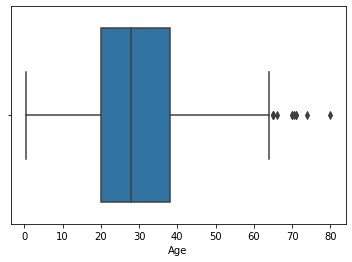

In [20]:
sns.boxplot(x['Age'])

In [25]:
x.groupby('Embarked').size()    

Embarked
C    168
Q     77
S    644
dtype: int64

In [28]:
x['Embarked'] = x['Embarked'].fillna('S')

In [29]:
x.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [30]:
x = pd.get_dummies(x)

In [31]:
x.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0
2,3,0,0,7.9250,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1


In [33]:
del x['Sex_female']
del x['Embarked_C']

In [34]:
x.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.2500,1,0,1
1,1,1,0,71.2833,0,0,0
2,3,0,0,7.9250,0,0,1
3,1,1,0,53.1000,0,0,1
4,3,0,0,8.0500,1,0,1


In [35]:
x.describe()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.836071,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [41]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [42]:
x

array([[ 0.82737724,  0.43279337, -0.47367361, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.43279337, -0.47367361, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.4745452 , -0.47367361, ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.4745452 , -0.47367361, ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  0.73769513,
         3.25137334, -1.62380254]])

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
reg = LogisticRegression().fit(x,y)

In [47]:
y_pred = reg.predict(x)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y,y_pred)

array([[473,  76],
       [107, 235]], dtype=int64)

In [51]:
(473+235)/891

0.7946127946127947

In [71]:
test = pd.read_csv("test.csv")

In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
test.shape

(418, 11)

In [57]:
0.2*418

83.60000000000001

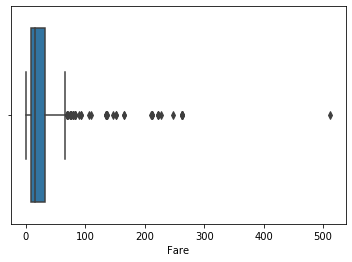

In [58]:
sns.boxplot(test['Fare'])

In [59]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [60]:
test = test.drop(['PassengerId','Name','Ticket','Cabin','Age'],axis=1)

In [61]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [62]:
test = pd.get_dummies(test)

In [63]:
del test['Sex_female']
del test['Embarked_C']

In [64]:
test.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0,0,7.8292,1,1,0
1,3,1,0,7.0000,0,0,1
2,2,0,0,9.6875,1,1,0
3,3,0,0,8.6625,1,0,1
4,3,1,1,12.2875,0,0,1


In [65]:
test.isna().sum()

Pclass        0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
test = StandardScaler().fit_transform(test)

In [67]:
test_pred = reg.predict(test)

In [69]:
df = pd.DataFrame(test_pred,columns=['Survived'])

In [70]:
Fin = pd.DataFrame()

In [72]:
Fin['PassengerId'] = test['PassengerId']

In [73]:
Fin['Survived'] = df['Survived']

In [74]:
Fin.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [78]:
Fin.to_csv(r'C:\Users\Ajay\Documents\Python class\Projects\titanic\test_pred.csv',index=False)